## learning-AI101 : perch regression (ridge and lasso)
- 혼자 공부하는 머신러닝과 딥러닝 : 150p~173p
- 2024.07.13.
-----

### ridge vs lasso
- ridge와 lasso 둘 다 다항회귀의 과도한 특성 갯수로 인한 overfitting을 막고자 하는 방법 (규제, regularization)
- 차이점
    - ridge : 제곱의 합
    - lasso : 절댓값의 합 (0이 될 수 있음)
   

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# 데이터 불러옴 (pandas)

df = pd.read_csv ('https://bit.ly/perch_csv_data')
df.head() # 웹 주소를 입력하여 데이터 가져옴

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [46]:
perch_full = df.to_numpy()
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [47]:
# 데이터셋 나누기

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(perch_full, perch_weight,
                                                   random_state=42)

# 만약 위와 같이 42가 아닌 다른 seed를 넣으면 특성을 더 뽑아낼 수 있음

In [48]:
# PolynomialFeatures를 이용하여 특성 늘리기 

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
# 절편 항을 무시하기 위해 위와 같이 설정
poly.fit(X_train) 
X_train_temp = poly.transform(X_train)

print (X_train.shape)
print (poly.get_feature_names_out()) # 특성이 어떻게 만들어졌는지 확인

# fit -> transform 순서로 진행

(42, 3)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [49]:
# test set에도 poly 적용

X_test_temp = poly.transform(X_test)

In [51]:
# 다중 회귀 모델 훈련

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_temp, y_train)

LinearRegression()

In [52]:
# score

print ("train score : ", lr.score(X_train_temp, y_train))
print ("test score : ", lr.score(X_test_temp, y_test))

# 과소적합 해결

train score :  0.9903183436982124
test score :  0.9714559911594134


In [53]:
# 만약에 더 많이 특성을 만들면?

poly = PolynomialFeatures(degree=5, include_bias=False) # 5차까지
poly.fit(X_train)

X_train = poly.transform(X_train)
X_test = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

print ("train score : ", lr.score(X_train, y_train))
print ("test score : ", lr.score(X_test, y_test))

# 음수가 나와버림 (당연히 train score에서는 엄청 좋은 점수)
# overfitting -> 해결 위해 ridge, lasso 도입

train score :  0.9999999999991097
test score :  -144.40579242684848


In [54]:
# ridge 적용

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

# 그나마 나아졌음

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


0.914955208141327

1e-09
[0.9970689190765376, 0.9148979990056553]
1e-08
[0.9970689190765376, 0.9148979990056553]
1e-07
[0.9970689190765376, 0.9148979990056553]
1e-06
[0.9970689190765376, 0.9148979990056553]
9.999999999999999e-06
[0.9970689190765376, 0.9148979990056553]
0.0001
[0.9970689190765376, 0.9148979990056553]
0.001
[0.9970689181957987, 0.914911531852043]
0.01
[0.9970689096574118, 0.9148787041531068]
0.1
[0.9970689115009236, 0.9148848720582887]
1.0
[0.9970689057757564, 0.914955208141327]
10
[0.9970781221750963, 0.9370566630114002]
100
[0.9971540947944865, 0.9166653741726939]
1000
[0.9969517780795065, 0.9622678007919336]
10000
[0.9965598534912653, 0.9812593923016548]
100000
[0.9958929394412163, 0.9751301917201803]
1000000
[0.994869095536153, 0.9578804692459075]
10000000
[0.9931839853818302, 0.9278726991592894]
100000000
[0.991801595372511, 0.9360699411882594]
1000000000
[0.9906713942908737, 0.9692106050157027]
10000000000
[0.989542284002464, 0.977419596298051]
100000000000
[0.9874256119010698, 0.966

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model

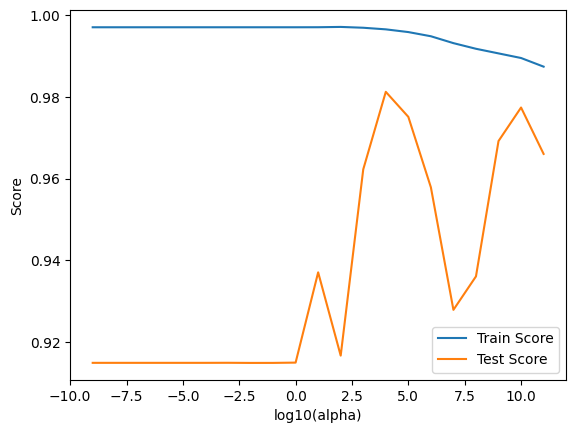

In [62]:
# 최적의 alpha값 찾기 위해 시각화

alpha_list = [10 * 10**n for n in range (-10, 11)] # alpha값을 극한으로 높여야 그나마 점수가 양수로 전환됨
score = dict() 

# Ridge 회귀 모델의 성능 평가
for num in alpha_list : 
    print (num)
    ridge = Ridge(alpha=num)
    ridge.fit(X_train, y_train)
    score[num] = [ridge.score(X_train, y_train), ridge.score(X_test, y_test)]
    print (score[num])

# 점수 출력 
for alpha, scores in score.items() :
    print(f"alpha: {alpha}, train score: {scores[0]}, test score: {scores[1]}")
    
# for compo in score.values() :
#     print (compo)
    
# test score set, train score set
train_score_set = np.array([compo[0] for compo in score.values()])
test_score_set = np.array([compo[1] for compo in score.values()])

print (train_score_set)
print (test_score_set)

# 시각화
plt.plot(np.log10(alpha_list), train_score_set, label='Train Score')
plt.plot(np.log10(alpha_list), test_score_set, label='Test Score')
plt.xlabel('log10(alpha)')
plt.ylabel('Score')
plt.legend()
plt.show()

# 아래를 보니 한 3.5~5.0 사이의 alpha가 가장 score가 높은 것으로 확인

1e-09
[0.9908634969377251, 0.9836916306228596]
1e-08
[0.9908634969330039, 0.9836916306075634]
1e-07
[0.9908634968857919, 0.9836916304546014]
1e-06
[0.9908634964136719, 0.9836916289249775]
9.999999999999999e-06
[0.9908634916924375, 0.9836916136286836]
0.0001
[0.9908634444767485, 0.9836914606597282]
0.001
[0.9908629710241893, 0.9836899221659073]
0.01
[0.9908581364325275, 0.9836739181945756]
0.1
[0.9908052463713466, 0.9834862814751804]
1.0
[0.9907713826366444, 0.9829845191292338]
10
[0.9907649441128418, 0.9814356958575168]
100
[0.9906548647873475, 0.9786178481203784]
1000
[0.9904554040437541, 0.9768671107271064]
10000
[0.9898283051651022, 0.9755574281566157]
100000
[0.9890166183160929, 0.97724377444986]
1000000
[0.9872872623097728, 0.9686153037646875]
10000000
[0.9628003375740318, 0.9086633614968596]
100000000
[0.9217919767225828, 0.9299641407515712]
1000000000
[0.9182779809187361, 0.9320093214379076]
10000000000
[0.5668784005340681, 0.5764984385292713]
100000000000
[0.0, -0.0551128292825

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.368e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.368e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

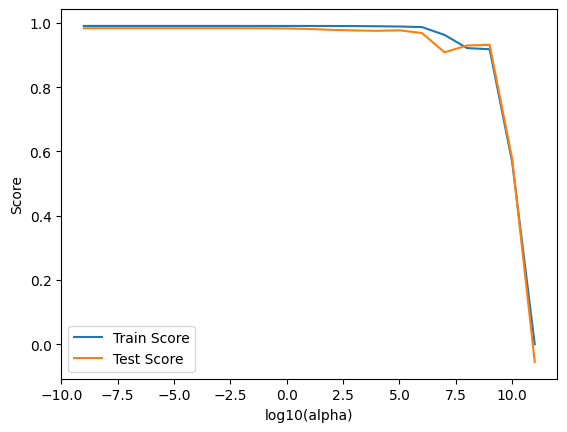

In [63]:
# lasso 적용
# lasso 또한 위와 같이 최적의 alpha값을 시각화를 통하여 찾기

from sklearn.linear_model import Lasso

alpha_list = [10 * 10**n for n in range (-10, 11)] # alpha값을 극한으로 높여야 그나마 점수가 양수로 전환됨
score = dict() 

# Ridge 회귀 모델의 성능 평가
for num in alpha_list : 
    print (num)
    lasso = Lasso(alpha=num)
    lasso.fit(X_train, y_train)
    score[num] = [lasso.score(X_train, y_train), lasso.score(X_test, y_test)]
    print (score[num])

# 점수 출력 
for alpha, scores in score.items() :
    print(f"alpha: {alpha}, train score: {scores[0]}, test score: {scores[1]}")
    
# for compo in score.values() :
#     print (compo)
    
# test score set, train score set
train_score_set = np.array([compo[0] for compo in score.values()])
test_score_set = np.array([compo[1] for compo in score.values()])

print (train_score_set)
print (test_score_set)

# 시각화
plt.plot(np.log10(alpha_list), train_score_set, label='Train Score')
plt.plot(np.log10(alpha_list), test_score_set, label='Test Score')
plt.xlabel('log10(alpha)')
plt.ylabel('Score')
plt.legend()
plt.show()

# 아래를 보니 5 이상부터 alpha값으로 설정하면 score가 급락